# Lowest Common Ancestor of a Binary Tree
Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes `p` and `q` as the lowest node in `T` that has both `p` and `q` as descendants (where we allow a node to be a descendant of itself).”

Constraints:
- All Node.val are unique.
- `p` != `q`.
- `p` and `q` will exist in the tree.

# Examples

**Example 1:**

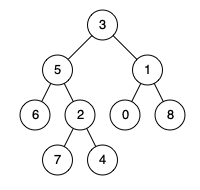
```
Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 1
Output: 3
```

Explanation: The LCA of nodes 5 and 1 is 3.

**Example 2:**

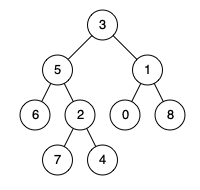
```
Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 4
Output: 5
```

Explanation: The LCA of nodes 5 and 4 is 5, since a node can be a descendant of itself according to the LCA definition.

**Example 3:**
```
Input: root = [1,2], p = 1, q = 2
Output: 1
```

In [1]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        def helper(node):
            if node == None:
                return 0, None
            left_result = helper(node.left)
            right_result = helper(node.right)
            if left_result[0] == 2:
                return 2, left_result[1]
            elif right_result[0] == 2:
                return 2, right_result[1]
            else:
                result = left_result[0] + right_result[0]
                result += 1 if node == p or node == q else 0
                if result == 2:
                    return 2, node
                else:
                    return result, None

        return helper(root)[1]

A simplified version of the above algorithm is as follows.

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


class Solution:
    def lowestCommonAncestor(self, root: TreeNode, p: TreeNode, q: TreeNode) -> TreeNode:
        def dfs(node):
            # Base case: null node
            if not node:
                return None

            # If the current node is either p or q, return it
            if node == p or node == q:
                return node

            # Recur for left and right children
            left = dfs(node.left)
            right = dfs(node.right)

            # If both left and right return a non-null value, current node is LCA
            if left and right:
                return node

            # Otherwise, return the non-null child (or null if both are null)
            return left if left else right

        # Start the DFS from the root
        return dfs(root)

In the following algorithm, when a node is pushed onto the stack, the elements before it in the stack are exactly all its ancestor nodes, starting from the root.

In [2]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        traverse_stack = [root]
        found_set = set()
        first_index = float('inf')
        while len(traverse_stack) > 0:
            if traverse_stack[-1] == p or traverse_stack[-1] == q:
                found_set.add(traverse_stack[-1])
                if len(found_set) == 1:
                    first_index = len(traverse_stack)
                if len(found_set) == 2:
                    return traverse_stack[first_index - 1]

            if traverse_stack[-1].left:
                traverse_stack.append(traverse_stack[-1].left)
                traverse_stack[-2].left = None
            elif traverse_stack[-1].right:
                traverse_stack.append(traverse_stack[-1].right)
                traverse_stack[-2].right = None
            else:
                traverse_stack.pop()
                if len(found_set) == 1:
                    first_index = min(len(traverse_stack), first_index)